## Введение:

Мне предстоит сделать исследование для магазина "Стримчик" в области продажи игр на разных платформах.
Магазин предоставил мне данные, собранные из открытых источников, по игровой индустрии. В этих данные мне необходимо найти закономерности, динамику для выявления успешный продуктов для будущей рекламной компании на 2017 год.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st



# Шаг 1. Откройте файл с данными и изучите общую информацию

In [2]:
games = pd.read_csv('/datasets/games.csv')
games.head(40)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


# Шаг 2. Подготовьте данные


In [4]:
games.columns = games.columns.str.lower()

In [5]:
games.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


открыл файл, посмотрел информацию (info)

методом ste.lower привел все колонки к нижнему регистру

In [6]:
games.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

# Пропуски:
Большенство пропусков мы имеем в колонках с рейтингами, у графах пользовательского (с учетом tbd) и рейтинга критиков пропуски составляют половину всего ДФ, я рассмотрел разные варианты и пришел к выводу что оптимальным вариантом будет оставить их.

In [7]:
games['critic_score'] = games['critic_score'].fillna(-1)
games['critic_score'] = games['critic_score'].astype(int)
games['critic_score'] = games['critic_score'].replace({-1: np.nan})

Колонку рейтинга критиков меняю тип данных на int, пропуски оставляю.

In [8]:
games['rating'] = games['rating'].fillna('unknown')
games['name'] = games['name'].fillna('unknown')
games['genre'] = games['genre'].fillna('unknown')

Жанр рейтинг и имя я заполнил как unknown (неизвестен)

In [9]:
games['year_of_release'] = games['year_of_release'].fillna(-3)
games['year_of_release'] = games['year_of_release'].astype(int)


пропуски в годе выпуска я так же заменил на индикатор -3



так же поменял тип данных на int столбцы года и рейтинга критиков, дробные значения там ненужны

In [10]:
games.loc[(games['user_score'] == 'tbd')]
games['user_score'] = games['user_score'].replace({'tbd': np.nan})

аббревиатура tbd означает что пока недостаточно данных для присвоения игре рейтинга, тоесть рейтинг неизвестен и tbd я так же заполняю unknown

In [11]:
games['user_score'] = games['user_score'].astype(float)

Меняю тип данных c object на float

In [12]:
games.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating                0
dtype: int64

In [13]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

Сложив нужные столбы я получил общею выручку по всем регионам

In [14]:
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown,28.31


# Шаг 3. Проведите исследовательский анализ данных

In [15]:
year_pivot = games.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')
year_pivot.sort_values(by = 'name', ascending = False)

,name
year_of_release,
2008,1427
2009,1426
2010,1255
2007,1197
2011,1136
2006,1006
2005,939
2002,829
2003,775


Составил сводную таблицу где показано количество выпущеннх игр каждый год. Ниже по этой таблице я сделаю график

[(1979, 2017)]

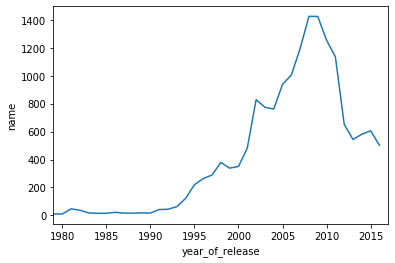

In [16]:
yeaplo1 = sns.lineplot(y='name', x='year_of_release',  data=year_pivot.reset_index())
yeaplo1.set(xlim=(1979, 2017))

так же я сделал таблицу с граффиком по выручке по годам.

[(1979, 2017)]

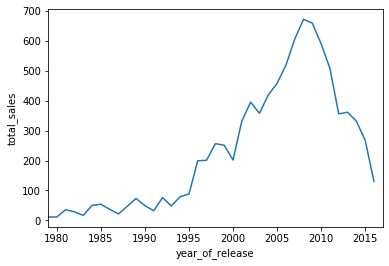

In [17]:
year_pivot1 = games.pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
year_pivot1
yeaplo1 = sns.lineplot(y='total_sales', x='year_of_release',  data=year_pivot1.reset_index())
yeaplo1.set(xlim=(1979, 2017))

Как мы видим - золотая эпоха игроиндустрии с 05 по 12 год, после чего идет резкий провал в выпущеных играх и соответсвенно выручки.

Эти данные опеределенно важны, по ним можно следить развитие индустрии.

In [18]:
year_platform_pivot = games.pivot_table(index = ['platform', 'year_of_release'], values = 'total_sales', aggfunc = 'sum')
year_platform_pivot.head(10)


total_sales
platform year_of_release             
2600     -3                     10.50
          1980                  11.38
          1981                  35.68
          1982                  28.88
          1983                   5.84
          1984                   0.27
          1985                   0.45
          1986                   0.67
          1987                   1.94
          1988                   0.74

In [19]:
year_platform_pivot1 = games.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum')
year_platform_pivot1.sort_values(by = 'total_sales', ascending = False).head(10)


,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


Я составил 2 сводные таблицы, 1я таблица которую я буду использовать для построения граффиков по топ платформам, 2я таблица для выявления этих топ платформ

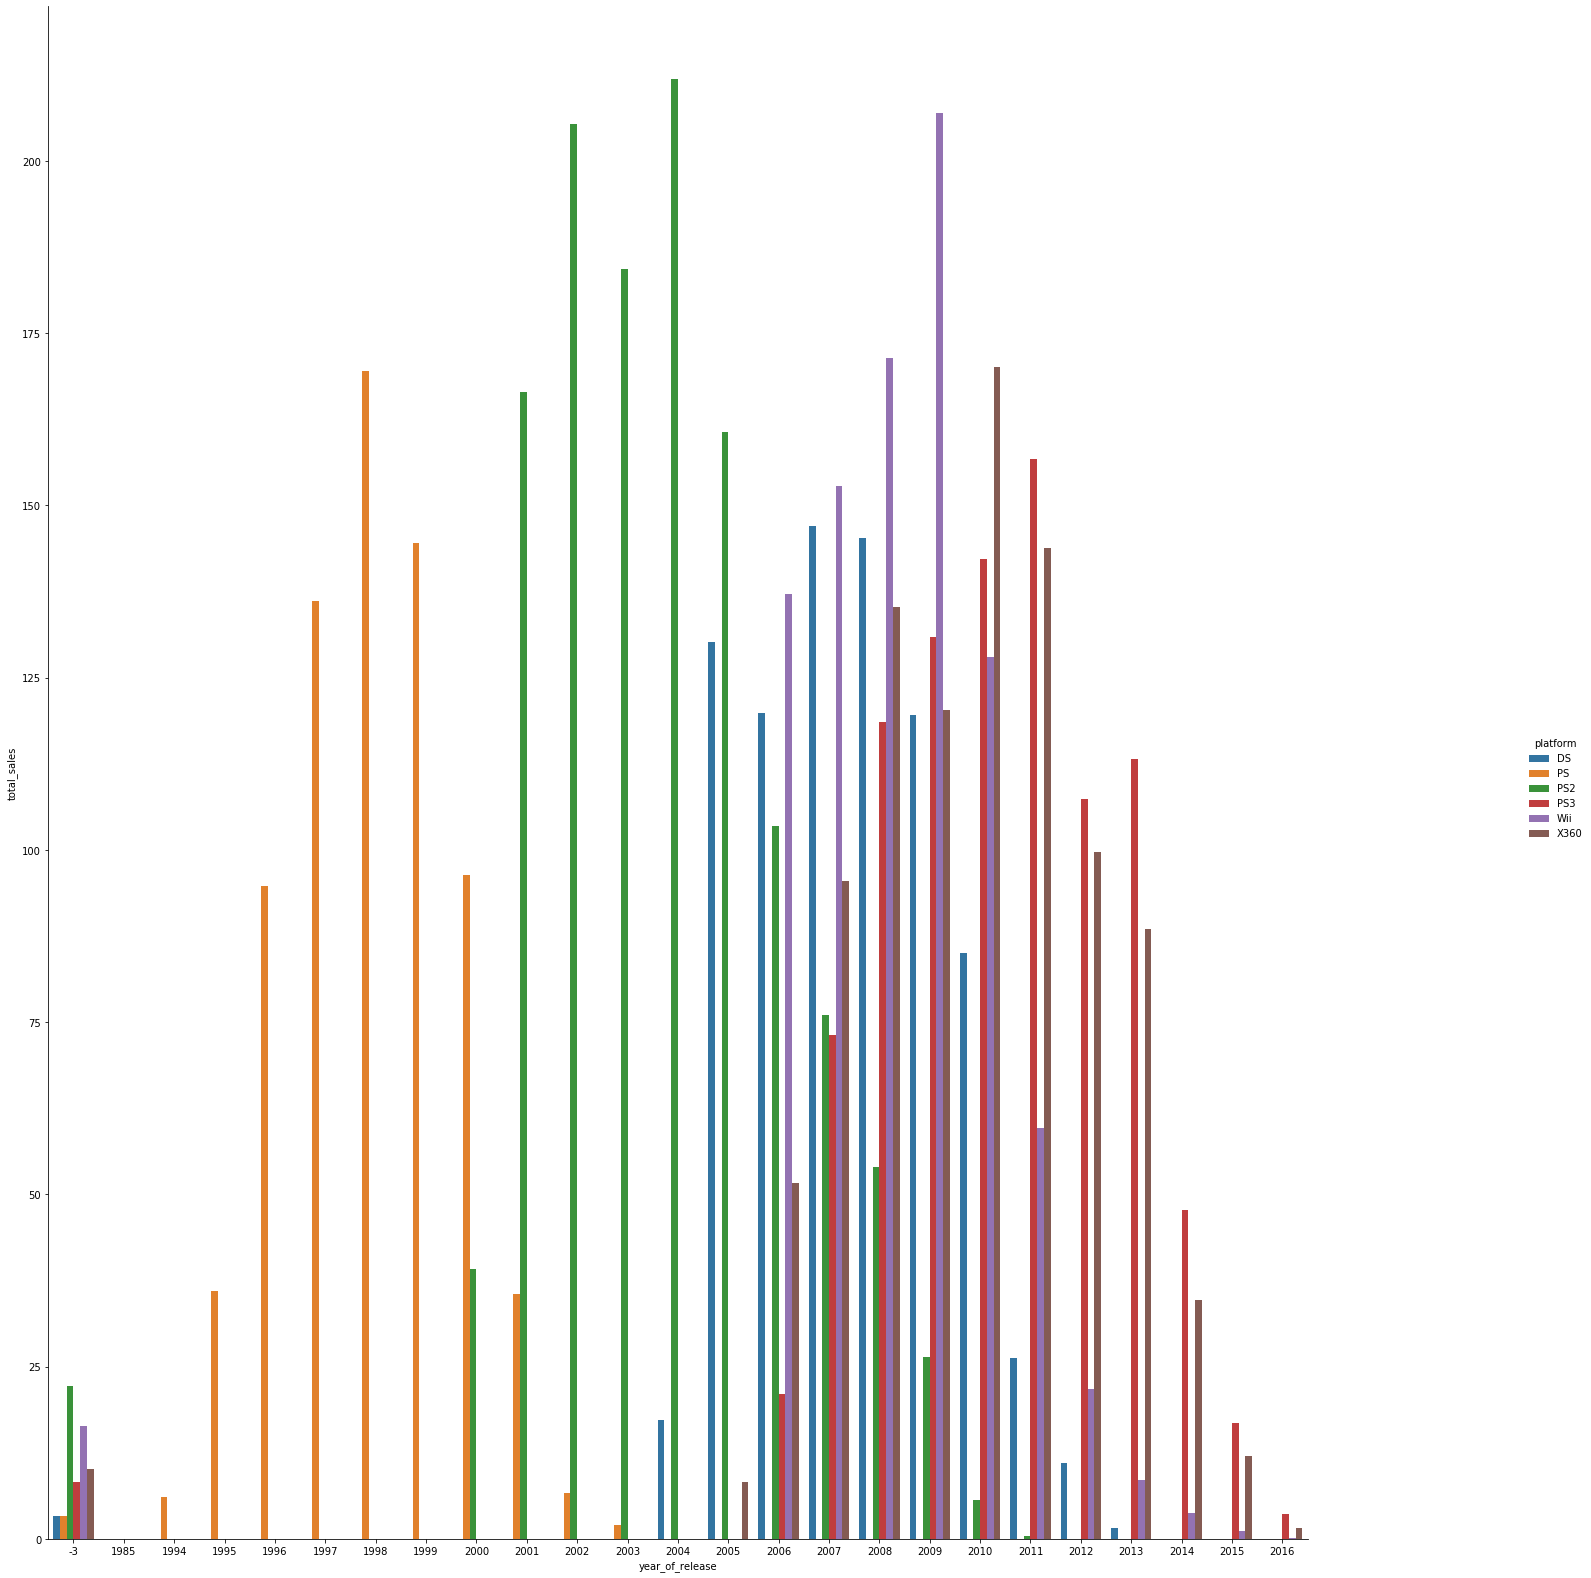

In [20]:
for_plot_plat_total = year_platform_pivot.reset_index()
plat_filtr = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

yyyy = sns.catplot(x="year_of_release", y="total_sales", hue="platform", kind="bar", data=for_plot_plat_total.query('@plat_filtr in platform'));

yyyy.fig.set_size_inches(25, 25)  

В среднем платформы живут окло 10 лет, самые успешные - больше, как например DS и PS2



--------------------------------------------------------------------------------------------------------------

За актуальный период я возьму данные за 2015-2016 года, до 15 года топовые на конец 16 года PS4 и xone только набирали обороты, тк многие еще делали игры только на устаревшие 360 и ps3, поэтому данные будут некорректны.



In [21]:
games_actual = games.query('year_of_release > 2014').reset_index()

In [22]:
games_actual.head(10)

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
1,77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
2,87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98
3,94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
4,99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,unknown,7.39
5,105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17
6,108,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,NaN,NaN,unknown,7.14
7,171,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,5.39
8,231,Uncharted: The Nathan Drake Collection,PS4,2015,Action,2.07,1.71,0.08,0.76,86.0,8.1,T,4.62
9,242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49


In [23]:
platform_sales = games_actual.pivot_table(index = ['platform', 'year_of_release'], values = 'total_sales', aggfunc = 'sum')

In [24]:
platform_sales.sort_values(by = 'total_sales', ascending =  False)
platform_sales

total_sales
platform year_of_release             
3DS      2015                   27.78
         2016                   15.14
PC       2015                    8.52
         2016                    5.25
PS3      2015                   16.82
         2016                    3.60
PS4      2015                  118.90
         2016                   69.25
PSP      2015                    0.12
PSV      2015                    6.25
         2016                    4.25
Wii      2015                    1.14
         2016                    0.18
WiiU     2015                   16.35
         2016                    4.60
X360     2015                   11.96
         2016                    1.52
XOne     2015                   60.14
         2016                   26.15

In [25]:
platform_sales_2015 = games_actual.query('year_of_release< 2016')
platform_sales_2015.reset_index(inplace=True)


In [26]:
platform_sales_2016 = games_actual.query('year_of_release == 2016')
platform_sales_2016.reset_index(inplace=True)



Для анализа я составил 2 таблицы на каждый из выбранных мнй годов

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

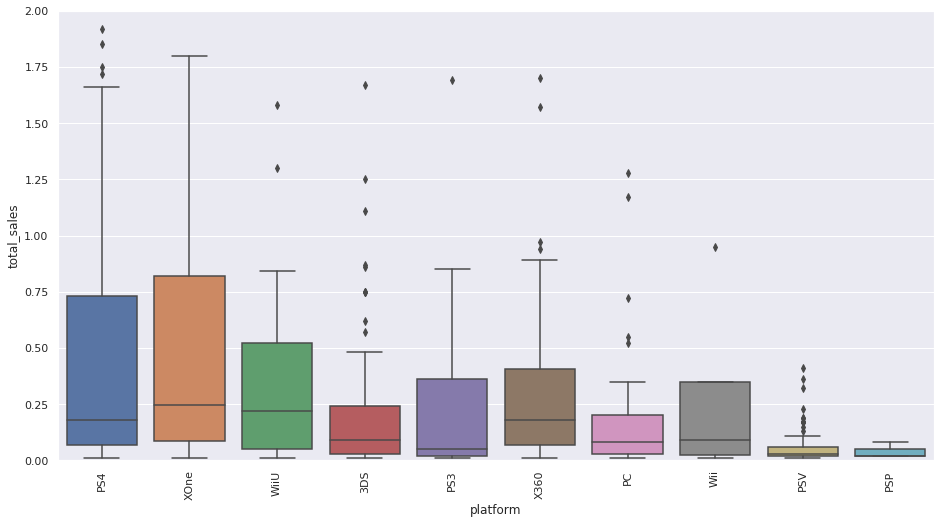

In [27]:
sns.set(rc={'figure.figsize':(15.7,8.27)})
ax = sns.boxplot(x="platform", y="total_sales", data=platform_sales_2015)
ax.set_ylim(0,2)
plt.xticks(rotation=90)


(array([0]), <a list of 1 Text xticklabel objects>)

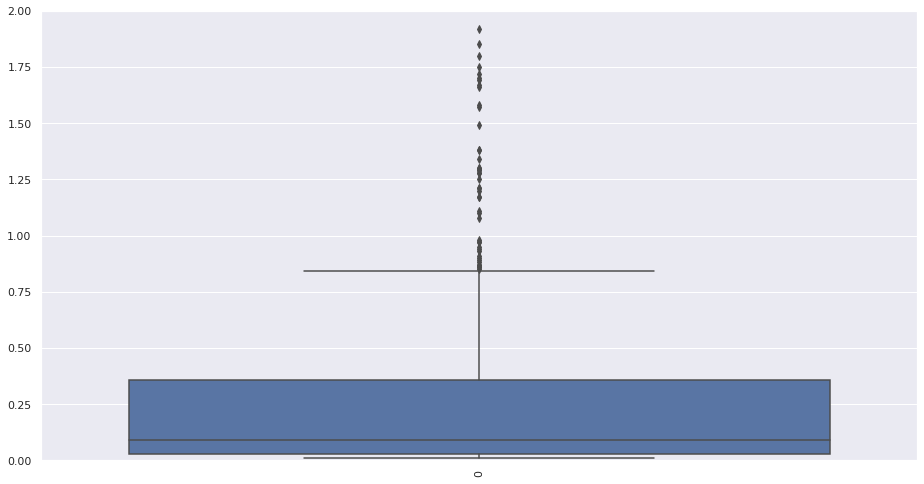

In [28]:
axx = sns.boxplot(data=platform_sales_2015['total_sales'])
axx.set_ylim(0,2)
plt.xticks(rotation=90)

Рассмотрим данные за 2015 год, в лидерах у нас консоли нового поколения xone и ps4, консоли предыдущего поколения зарабатывают хуже, но все же прилично.

Сравним boxplot по консолям и boxplot общих продаж за год. Основная масса общих продаж за год приблезительно 850тысяч, однако консоли нового поколения значительно преодолели данный рубеж ps4- 1.65 млн, xone - 1.8 млн, прерыдущее поколение практически совтодает с годовым показателем.

из поративных консолей можно выделить wiiU который так же примерно соответсвует показателю за год

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

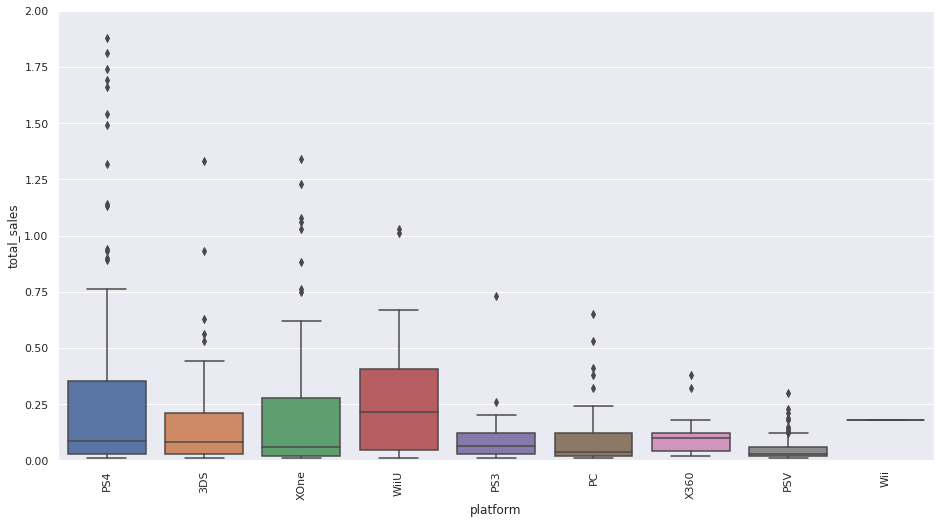

In [29]:
sns.set(rc={'figure.figsize':(15.7,8.27)})
ax1 = sns.boxplot(x="platform", y="total_sales", data=platform_sales_2016)
ax1.set_ylim(0,2)
plt.xticks(rotation=90)


(array([0]), <a list of 1 Text xticklabel objects>)

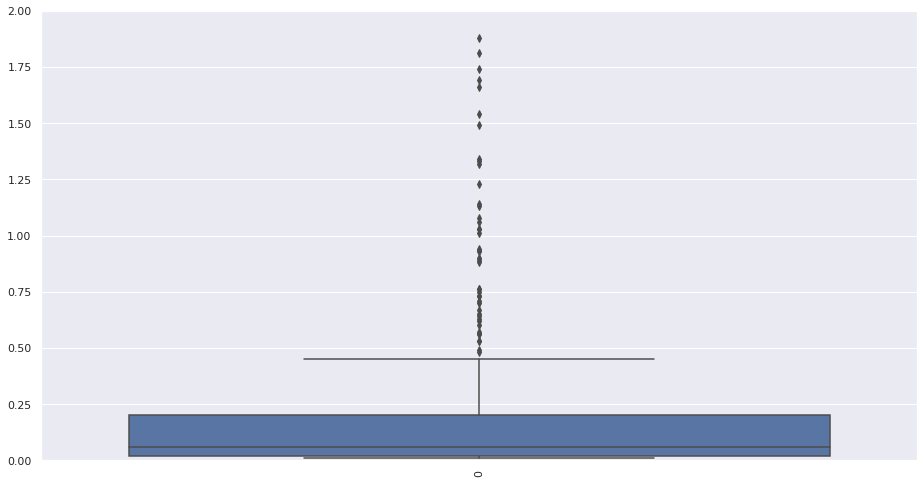

In [30]:
ax11 = sns.boxplot(data=platform_sales_2016['total_sales'])
ax11.set_ylim(0,2)
plt.xticks(rotation=90)

Данный за 16 год у нас не полные, поэтому будут ниже 15го, но меня для прогноза в первую очередь интересует динамика + информация (на 17 год мне известно что выпуск новых консолей не запланирован, соответственно я буду оттталкиваться от того что мы имеем в 16 году)

Ps3 и x360 значительно потеряли выручку, продажи на данные платформы хуже показателей за год больше чем в 2 раза, консоли нового поколения все еще имеют продажи выше среднего но как мне кажется немного сбалансировались.

Из портативных в этом году выстрелили wiiu и 3ds 

Сравнив 2 граффика по годам я считаю что рассматривать стоит только 4 платформы (PS4,Xone,3DS,WiiU)

На предшественников первых 2 игр становится меньше соответсвенно и продажи относительно старших моделей в 16 году гораздо ниже, в 17 году я считаю эта тенденция станет только стремительноее.



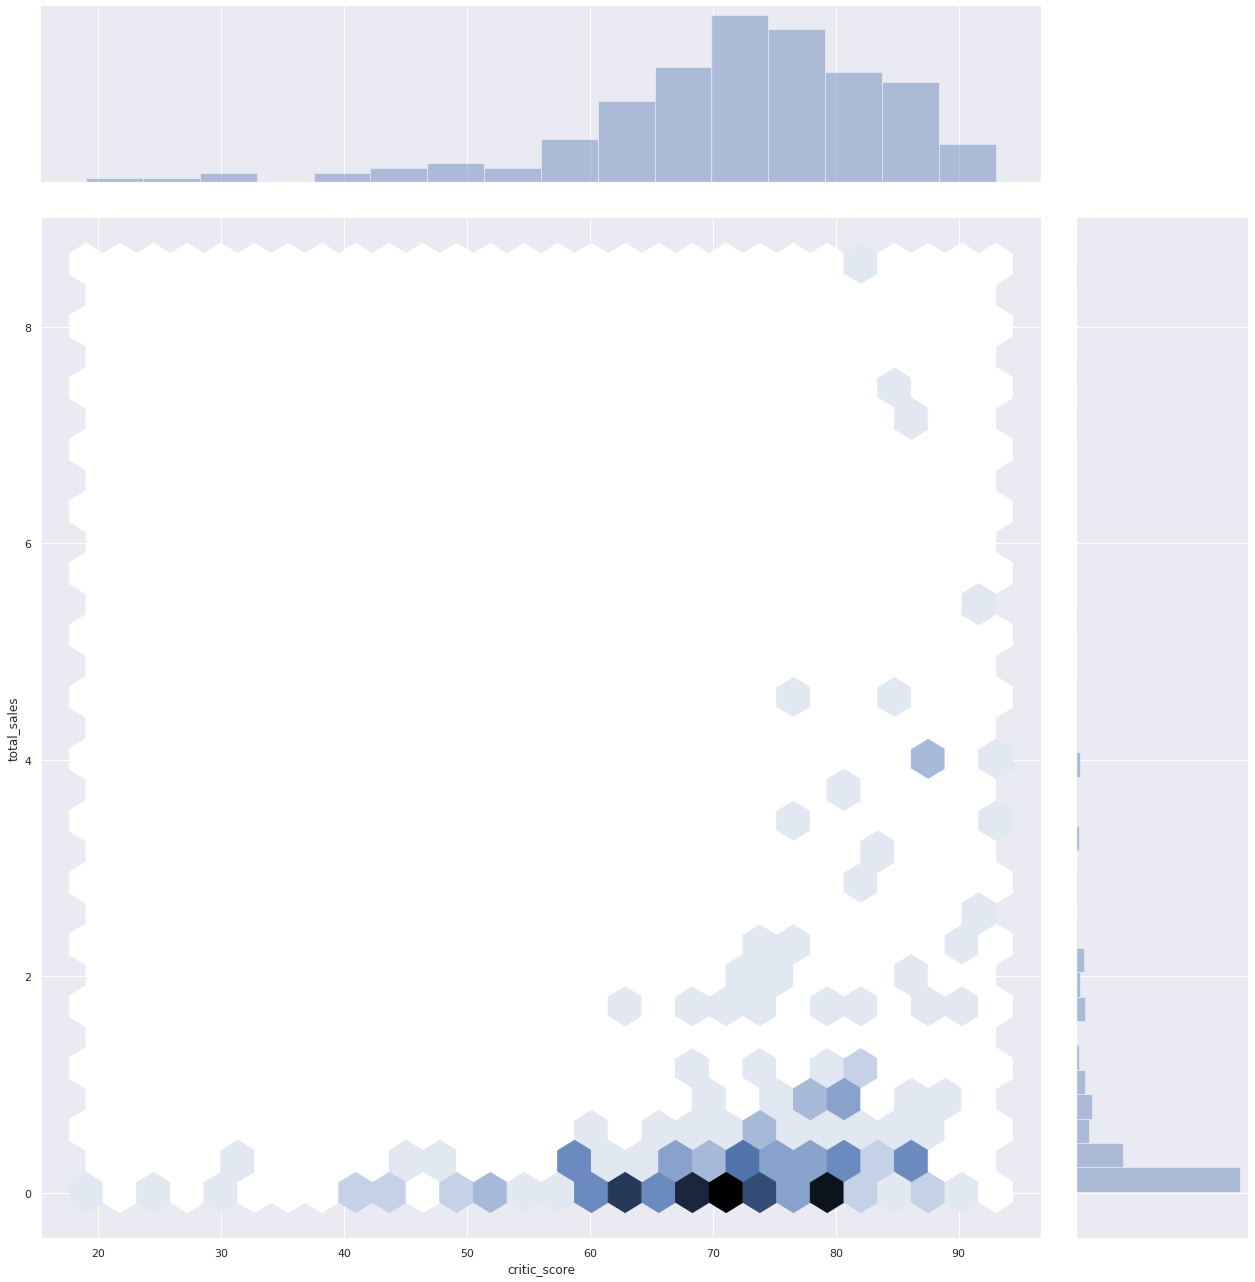

In [31]:
filter_platf = 'PS4'
diras = sns.jointplot(y='total_sales', x='critic_score', data = games_actual.query('@filter_platf in platform'), kind='hex',);

diras.fig.set_size_inches(20,20)

Для проверки зависимости я выбрал платформу PS4.
как мне кажется зависмость есть, большенство игр проданых больше чем на 2млн имеют рейтинг выше 75



In [32]:
ps4_actual = games_actual.query('@filter_platf in platform')
ps4_actual['critic_score'].corr(ps4_actual['total_sales'])

0.3928485555130601

Мои наблюдения подтверждает значение корреляции - 0.39

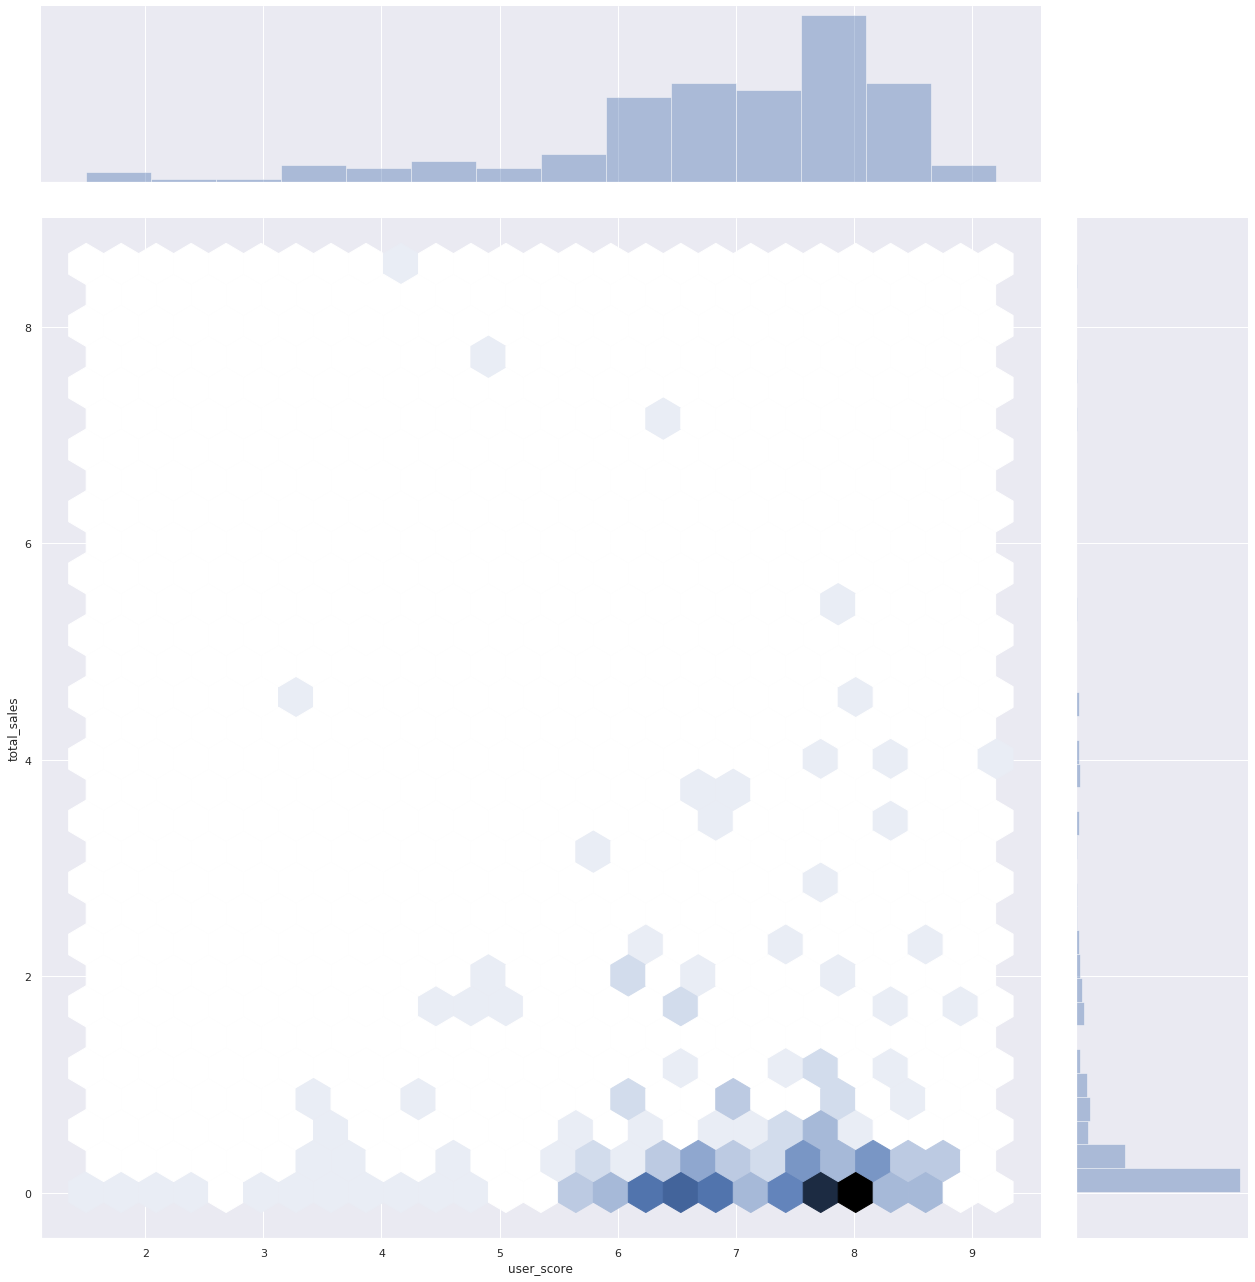

In [33]:

diras2 = sns.jointplot(y='total_sales', x='user_score', data =games_actual.query('@filter_platf in platform'), kind='hex',);
diras2.fig.set_size_inches(20,20)


как мне кажется, влияния пользовательского рейтинга на продажи практически нет.

In [34]:
ps4_actual['user_score'].corr(ps4_actual['total_sales'])

-0.05973845712638215

опять же я оказался прав, корреляция практически нулевая

проверю корреляцию по всем платформам

In [35]:
games_actual['user_score'].corr(games_actual['total_sales'])

-0.0019642931122463344

In [36]:
games_actual['critic_score'].corr(games_actual['total_sales'])

0.32552662253933334

данные по всем платформам в целом схожи с теми что я получил ииследуя только данные платформы PS4

# Шаг 4. Составьте портрет пользователя каждого региона

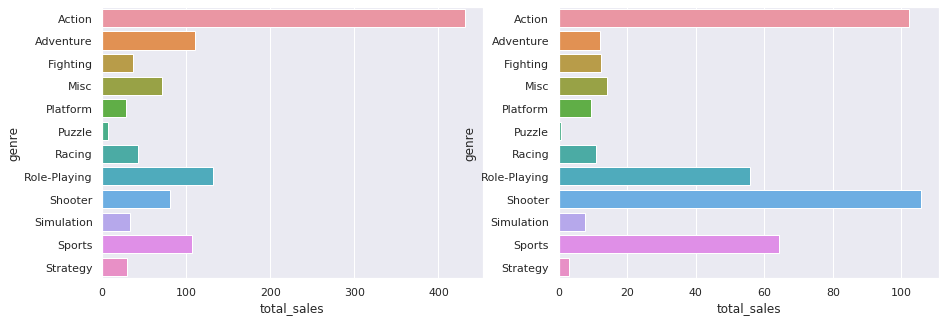

In [37]:
genre = games_actual.groupby(by= ['genre'])
fig, ax = plt.subplots(ncols = 2, figsize = (15, 5))
sns.catplot(data = genre.count().reset_index(), y= 'genre', x = 'total_sales', kind = 'bar', ax = ax[0])
sns.catplot(data = genre.sum().reset_index(), y= 'genre', x = 'total_sales', kind = 'bar', ax = ax[1])
fig.show()
plt.close()
plt.close()

по количеству выпущенных игр на первом месте, с подавляющим отрывом у нас Action игры, но если посмотреть на выручку ситуация не столь однозначна.

Игр в стише shooter выпущено меньше 100, однако они заработали даже больше чем игры Action. Так же игры rpg и спортивные относительно количества сделали хорошие продажи

Самые прибыльные жанры - Action и Shooter,

Самые не прибыльные - pazzle and strategy.

In [38]:
eu_platform_top = games_actual.pivot_table(index = 'platform' , values = 'eu_sales', aggfunc = 'sum')
eu_platform_top.sort_values(by  = 'eu_sales', ascending =  False).reset_index()

,platform,eu_sales
0,PS4,83.54
1,XOne,28.10
2,PC,9.10
3,3DS,7.39
4,PS3,7.30
5,WiiU,6.49
6,X360,4.21
7,PSV,1.08
8,Wii,0.73
9,PSP,0.00


Топ 5 платформ в Европе: PS4, XOne, PC, 3DS, PS3

In [39]:
eu_genre_top = games_actual.pivot_table(index = 'genre' , values = 'eu_sales', aggfunc = 'sum')
eu_genre_top.sort_values(by  = 'eu_sales', ascending =  False).reset_index()

,genre,eu_sales
0,Shooter,40.28
1,Action,34.82
2,Sports,27.82
3,Role-Playing,17.21
4,Racing,6.52
5,Adventure,4.67
6,Misc,4.26
7,Simulation,3.74
8,Fighting,3.72
9,Platform,3.20


Топ 5 игровых жанров в Европе: Shooter, Action, Sports, Role-Playing, Racing

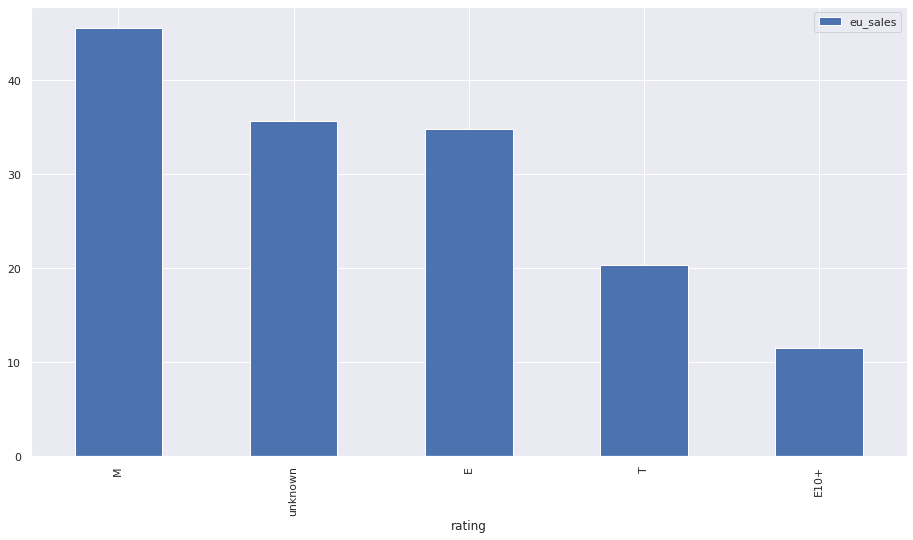

In [40]:
eu_rating_top = games_actual.pivot_table(index = 'rating' , values = 'eu_sales', aggfunc = 'sum')
eu_rating_top.sort_values(by  = 'eu_sales', ascending =  False).reset_index().plot(x = 'rating', kind = 'bar', grid = True)

Больше всего заработали игры с рейтингом М(игры для людей от 18 лет) я считаю что зависимость есть, игры с таким рейтингом покупают более обеспеченные люди, тк у детей п одростков денег нет или мало.

In [41]:
na_platform_top = games_actual.pivot_table(index = 'platform' , values = 'na_sales', aggfunc = 'sum')
na_platform_top.sort_values(by  = 'na_sales', ascending =  False).reset_index()

,platform,na_sales
0,PS4,63.86
1,XOne,50.30
2,3DS,10.31
3,WiiU,8.86
4,X360,8.05
5,PS3,5.66
6,PC,3.72
7,PSV,0.54
8,Wii,0.49
9,PSP,0.00


Топ 5 платфор в северной америке: PS4, XOne, 3DS, WiiU, X360

In [42]:
na_genre_top = games_actual.pivot_table(index = 'genre' , values = 'na_sales', aggfunc = 'sum')
na_genre_top.sort_values(by  = 'na_sales', ascending =  False).reset_index()

,genre,na_sales
0,Shooter,48.18
1,Action,33.68
2,Sports,26.31
3,Role-Playing,19.82
4,Misc,5.58
5,Fighting,5.54
6,Adventure,3.84
7,Platform,3.78
8,Racing,2.82
9,Simulation,1.36


Топ 5 жанров в северной америке: Shooter, Action, Sports, RPG, Misc

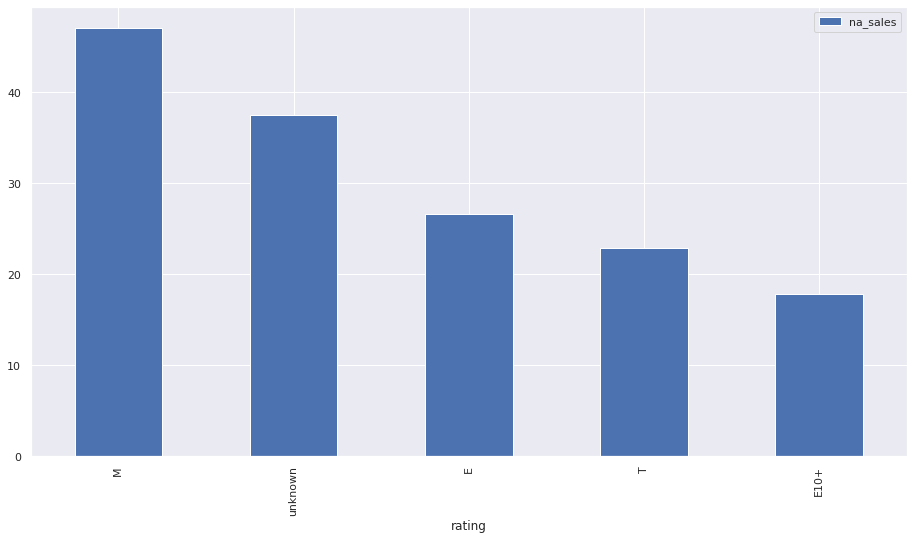

In [43]:
na_rating_top = games_actual.pivot_table(index = 'rating' , values = 'na_sales', aggfunc = 'sum')
na_rating_top.sort_values(by  = 'na_sales', ascending =  False).reset_index().plot(x = 'rating', kind = 'bar', grid = True)

В северной америка опять же чем взрослее рейтинг тем выше продажи

In [44]:
jp_platform_top = games_actual.pivot_table(index = 'platform' , values = 'jp_sales', aggfunc = 'sum')
jp_platform_top.sort_values(by  = 'jp_sales', ascending =  False).reset_index()

,platform,jp_sales
0,3DS,23.55
1,PS4,12.05
2,PSV,8.41
3,PS3,4.97
4,WiiU,4.12
5,XOne,0.18
6,PSP,0.12
7,PC,0.00
8,Wii,0.00
9,X360,0.00


Топ 5 платформ в Японии: 3DS, PS4 ,PSV, PS3, WiiU

In [45]:
jp_genre_top = games_actual.pivot_table(index = 'genre' , values = 'jp_sales', aggfunc = 'sum')
jp_genre_top.sort_values(by  = 'jp_sales', ascending =  False).reset_index()

,genre,jp_sales
0,Action,23.05
1,Role-Playing,13.41
2,Shooter,3.79
3,Misc,3.19
4,Adventure,2.22
5,Simulation,1.93
6,Sports,1.65
7,Fighting,1.54
8,Platform,1.42
9,Puzzle,0.52


Топ 5 жанров в Японии: Action, Role-Playing, Shooter, Misc, Adventure

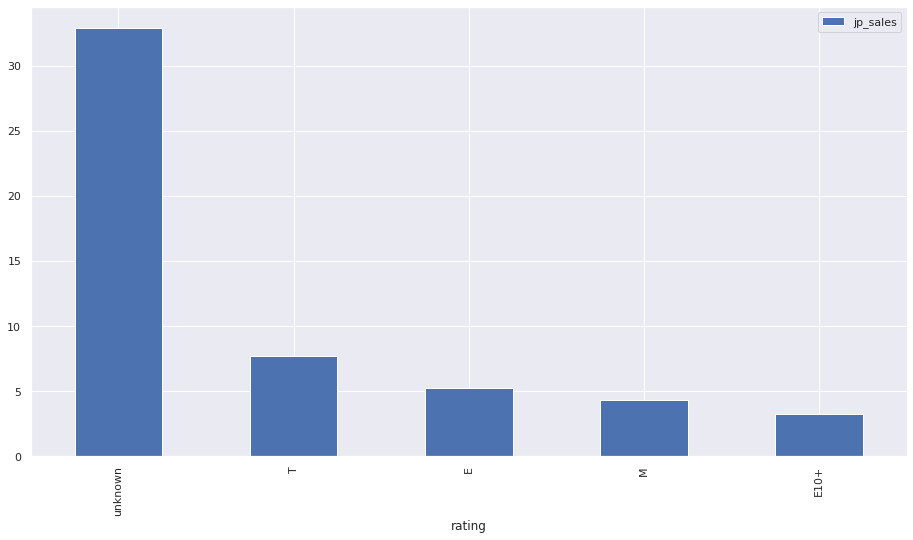

In [46]:
jp_rating_top = games_actual.pivot_table(index = 'rating' , values = 'jp_sales', aggfunc = 'sum')
jp_rating_top.sort_values(by  = 'jp_sales', ascending =  False).reset_index().plot(x = 'rating', kind = 'bar', grid = True)

В Японии подавляющее число игр продано с рейтингом который нам неизвестен.

Я могу предположить что это какие то игры Японского производства, которые пользуются попульярностью и на западе

Так же в Японии сильнее отличается топ 5 жанров, на втором месте там игры RPG, изначально жанр mmorpg зародился в азии и там досих пор многие в него играют, хотя на западе он идет на спад

In [47]:
other_platform_top = games_actual.pivot_table(index = 'platform' , values = 'other_sales', aggfunc = 'sum')
other_platform_top.sort_values(by  = 'other_sales', ascending =  False).reset_index()

,platform,other_sales
0,PS4,28.70
1,XOne,7.71
2,PS3,2.49
3,3DS,1.67
4,WiiU,1.48
5,X360,1.22
6,PC,0.95
7,PSV,0.47
8,Wii,0.10
9,PSP,0.00


Топ 5 платформ по остальному миру: PS4, XOne, PS3, 3DS, WiiU

In [48]:
other_genre_top = games_actual.pivot_table(index = 'genre' , values = 'other_sales', aggfunc = 'sum')
other_genre_top.sort_values(by  = 'other_sales', ascending =  False).reset_index()

,genre,other_sales
0,Shooter,13.48
1,Action,10.58
2,Sports,8.55
3,Role-Playing,5.38
4,Fighting,1.57
5,Adventure,1.25
6,Racing,1.23
7,Misc,1.14
8,Platform,0.88
9,Simulation,0.52


Топ 5 жанров по остальному миру: Shooter, Action, Role-Playing, Fighting

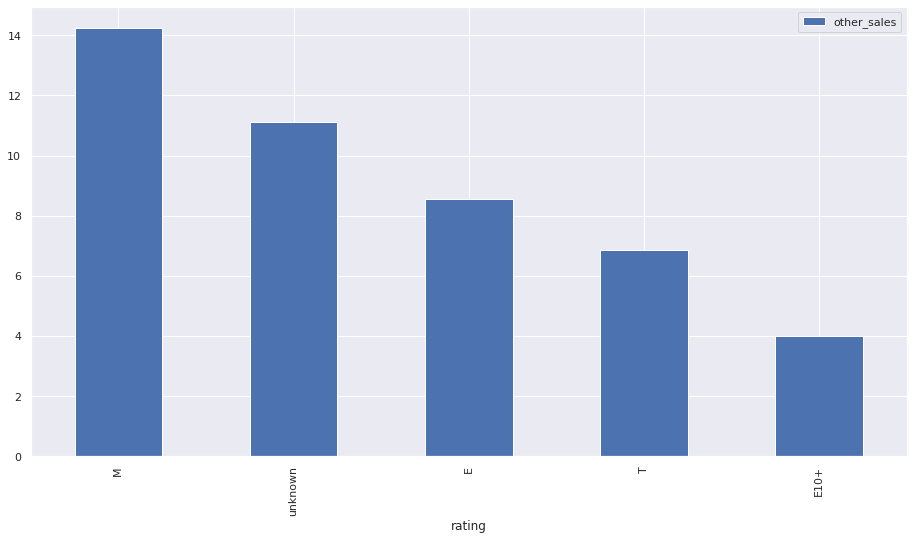

In [49]:
other_rating_top = games_actual.pivot_table(index = 'rating' , values = 'other_sales', aggfunc = 'sum')
other_rating_top.sort_values(by  = 'other_sales', ascending =  False).reset_index().plot(x = 'rating', kind = 'bar', grid = True)

Ситуация по рейтингу схожа с ситуацией в Америке и Европе. Рейтинг М приносит денег больше всего.

# Шаг 5. Проверьте гипотезы

In [50]:

games_actual1 = games_actual.query('user_score != "NaN"')

In [51]:
games_actual1

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
3,94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
5,105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17
7,171,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,5.39
8,231,Uncharted: The Nathan Drake Collection,PS4,2015,Action,2.07,1.71,0.08,0.76,86.0,8.1,T,4.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,16618,Xblaze: Lost Memories,PSV,2015,Adventure,0.01,0.00,0.00,0.00,NaN,7.0,M,0.01
1091,16630,Sébastien Loeb Rally Evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63.0,8.2,E,0.01
1092,16643,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,NaN,6.6,E,0.01
1095,16652,Fast Racing Neo,WiiU,2016,Action,0.00,0.01,0.00,0.00,81.0,8.5,E,0.01


H0 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H1 - Средние пользовательские рейтинги платформ Xbox One и PC отличаются

In [52]:
spl_1 = games_actual1.loc[(games_actual1['platform'] == "XOne"),'user_score']
spl_2 = games_actual1.loc[(games_actual1['platform'] == "PC"),'user_score']
alpha = 0.05
results = st.ttest_ind(
    spl_1,
    spl_2)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 0.2778542084733835
Не получилось отвергнуть нулевую гипотезу


Мне не удалось подтвердить нулевую гипотезу, рейтинги по платформам отличаются.

H0 - Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») одинаковые.

H1 - Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.


In [53]:
spl_3 = games_actual1.loc[(games_actual1['genre'] == "Action"),'user_score']
spl_4 = games_actual1.loc[(games_actual1['genre'] == "Sports"),'user_score']
alpha = 0.05
results = st.ttest_ind(
    spl_3,
    spl_4)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 1.0012846807938657e-13
Отвергаем нулевую гипотезу


Опять же, нулевую гипотезу подтвердить не получилось, выходит рейтинги у Sport и  Action разные


-------------------------------------------------------------------------------------------------------

## Вывод:

Для начала хотелось бы отметить качество данных которые я получил:
    
    Вот к примеру игра которая в наших данных идет без рейтинга, в пару кликов я смог найти по ней информацию.

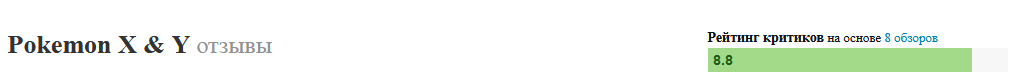

Предлагаю гипотетическому специалисту отвечающему за сбор тщательнее собирать данные, половина пропусков по параметру котрый на обязательно нужен - не круто.



 Перед началом исследования я проверил общую картину происходящего в индустрии, я выяснил в каких годах выло выпущенно больше всего игр, и как меняются продажи на платформах с самыми высокими продажами за всю историю. Я получил 2 графика:

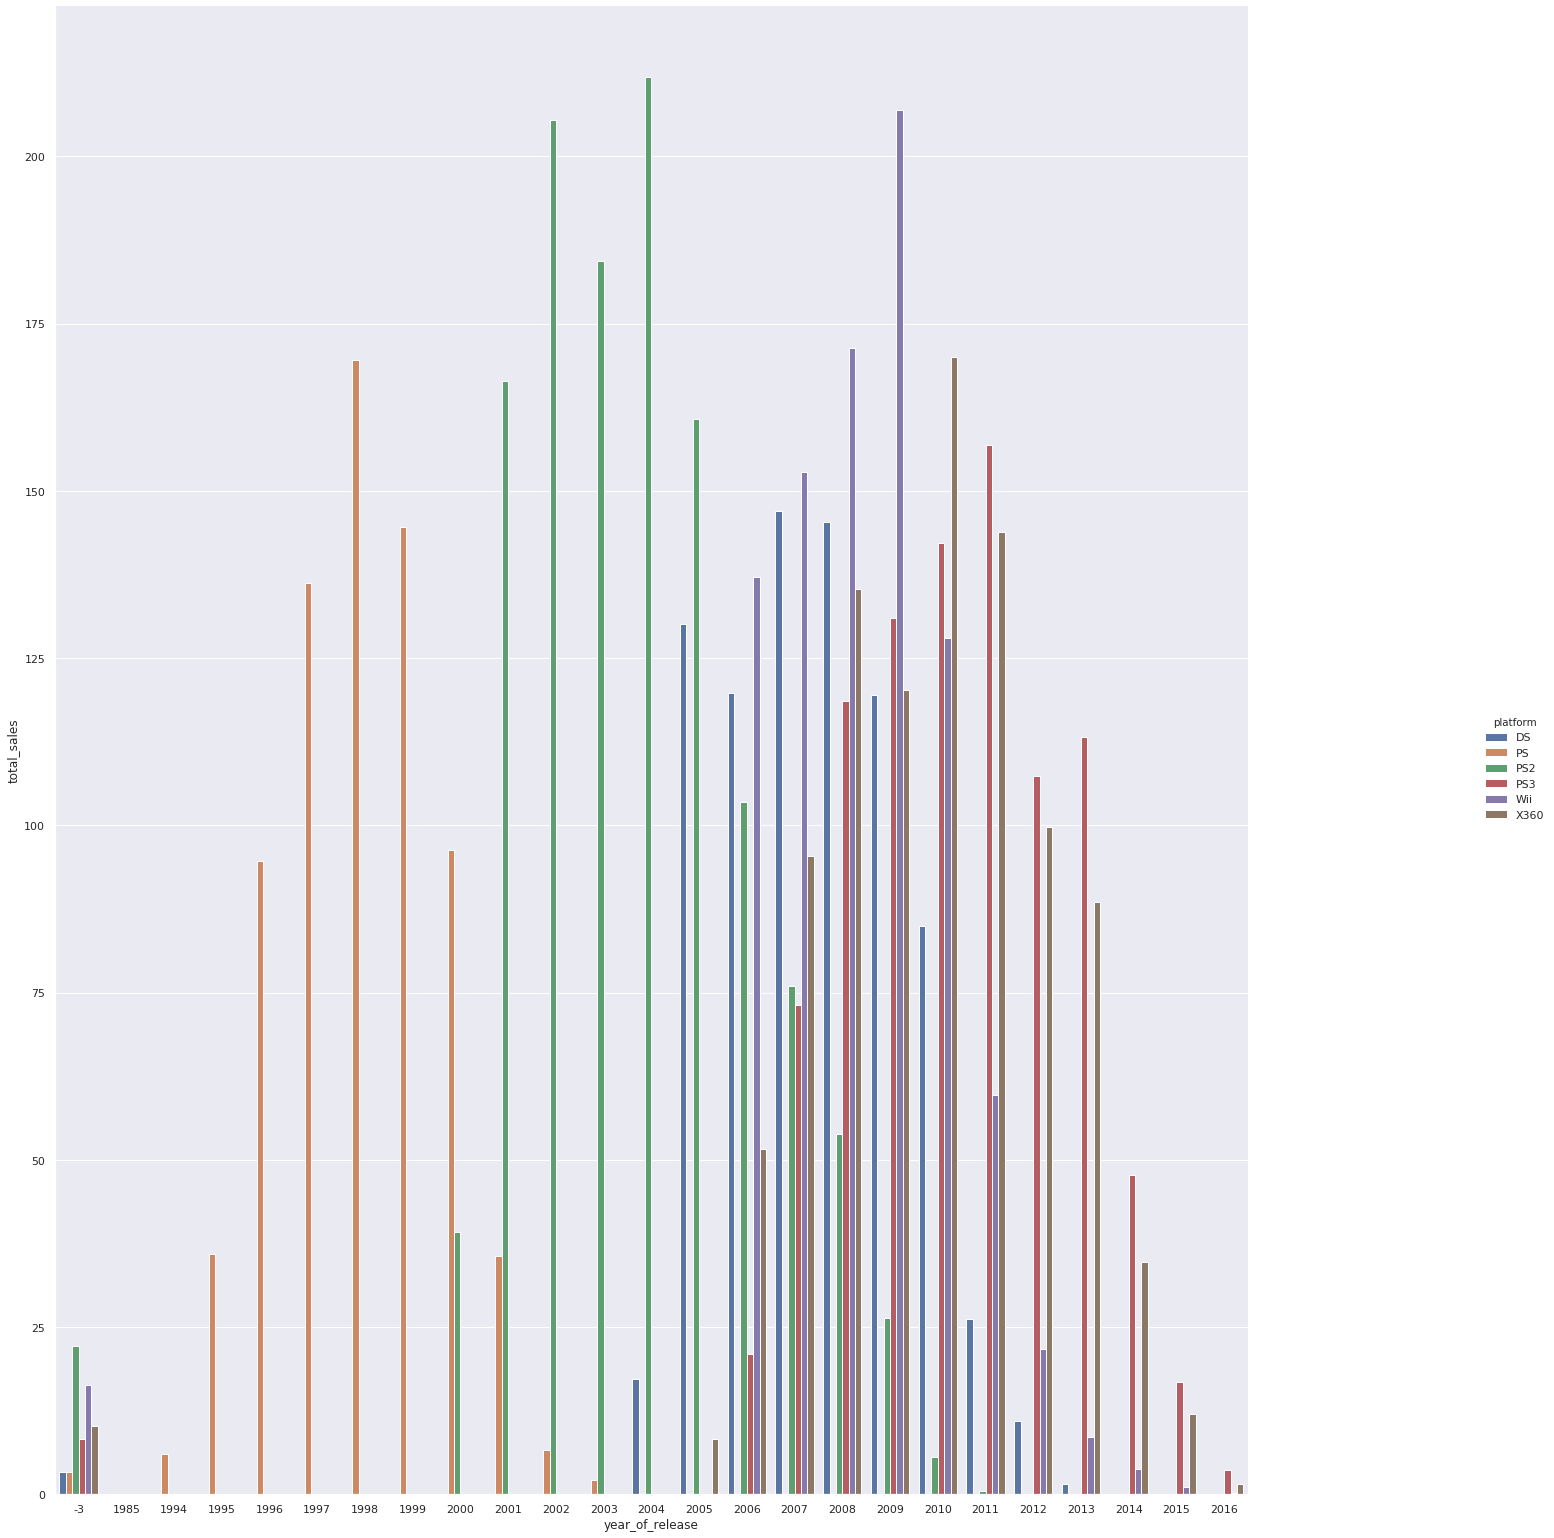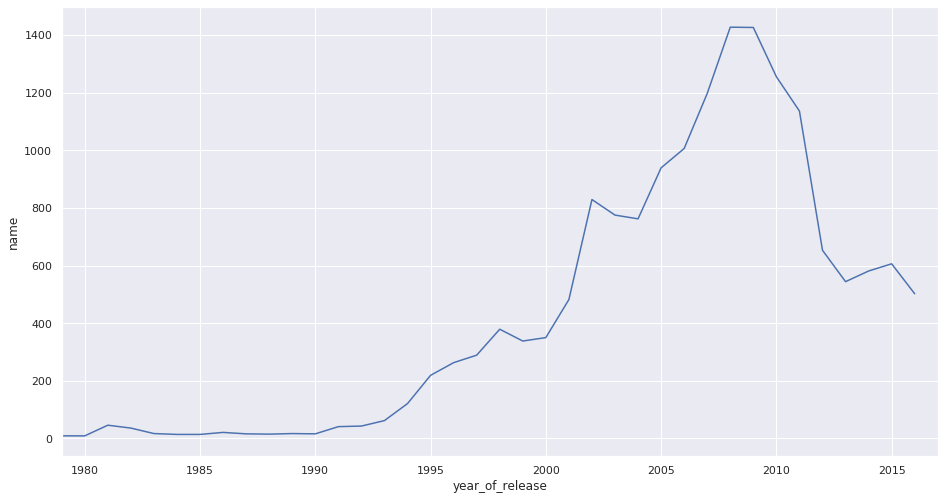

По первому графику можно отметить что продажи каждой платформы во времени имеют нормальное распределение, жизненый цикл каждой платформы около 10 лет.

Если сопоставить 2 графика видно что максимальная концентрация различный платформ находилась в промежутке между 2005 и 2012
на втором графике соответственно видно максимальное количество выпущенных игр в этот период.


Я решил проверить все ли так плохо в индустрии? Возможно количество не значит качество, и низкое количество выпускаемых игр после 2012 года компенсируется большой выручкой?

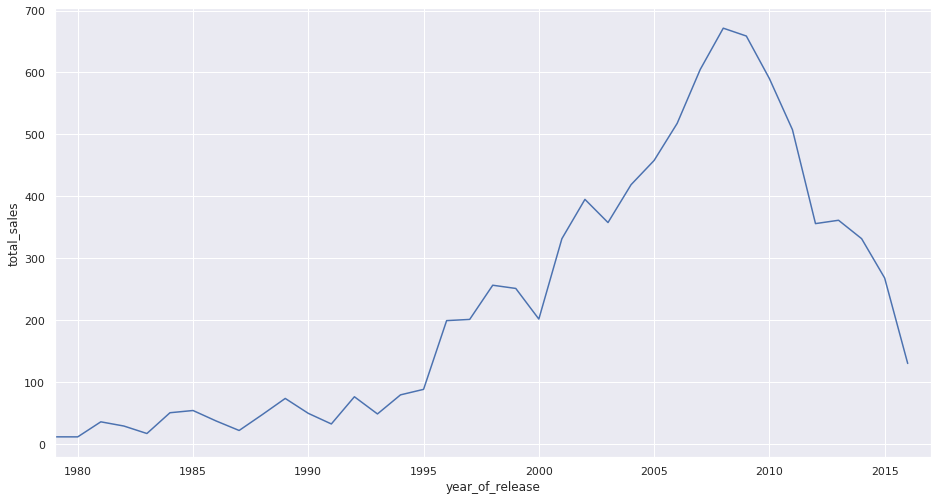

Но как видно по графику, игры приносят все меньше денег и скоро сравняются с уровнем 1995 года (может магазин "Стимчик" вообще закрыть стоит?)

В любом случае эти данные мне нужны для понимания общей картины. 

Для составления прогноза на 2017 год я решил взять данные за 2 предыдущих года, мне кажется брать больший период не целесообразно, тк там будут отображаться данные по консолям продажи игр на которые идут на спад в связи с их устареванием.

Я построил boxplotы по продажам каждой платформы и общим на каждый год, из полученых графиков я сделал вывод что в 2017 году потенциально прибыльными будут лишь 4 консоли: PS4,Xone,3DS,WiiU На них я и предлагаю делать с тавку в будущем году.


-----------------------------------------------------------------------------------------------------------

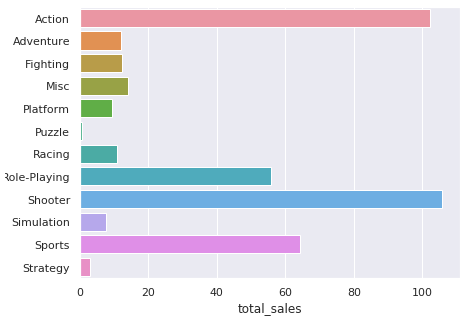

Далее я исследовал прибыльность игр исходя из их жанра, как оказалось самые прибыльные жанры - Action и Shooter, самые не прибыльные - pazzle and strategy. Так же много заработали игры жанров RPG и Sport.

Предлагаю в 2017 году в магазине "Стимчик" продвигать игры данных жанров.

Для продвижения в разных регионах следует понимать какие там тренды, для грамотного составления маркетинговой политики.

Для каждого региона я выявил топ жанров и топ платформ. Вот что у меня получилось:
* Топ 5 платформ в Европе: PS4, XOne, PC, 3DS, PS3
* Топ 5 платфор в северной америке: PS4, XOne, 3DS, WiiU, X360
* Топ 5 платформ в Японии: 3DS, PS4 ,PSV, PS3, WiiU
* Топ 5 платформ по остальному миру: PS4, XOne, PS3, 3DS, WiiU

Топ 2 кроме японии один и тот же -ps4, xone, в японии же больше популярны местные производители (ни 1 консоль microsoft в топ не вошла) и при этом они предпочитают поративные консоли, возможно из-за местного ритма жизни, - посидеть и поиграть спокойно могут не все.


* Топ 5 игровых жанров в Европе: Shooter, Action, Sports, Role-Playing, Racing    
* Топ 5 жанров в северной америке: Shooter, Action, Sports, RPG, Misc    
* Топ 5 жанров в Японии: Action, Role-Playing, Shooter, Misc, Adventure
* Топ 5 жанров по остальному миру: Shooter, Action, Role-Playing, Fighting

 Среди жанров рейтинги схожи с топом жанров которые я выбрал выше, однако у каждого региона есть свои особенности, и в топ жанров там входят казалось бы не самые популярные. Соответсвенное в данных регионах такие жанры продвигать стоит. Например в Европе любят гонки, а в Японии и Америке Misc   

Так же я сравнил влияния рейтинга  ESRB на продажи игр, оказалось что во всем мире кроме Японии игры с рейтингом М (18+) делали самые большие продажи. В Японии же рейтинг игр находящихся в топе - неизвестен.

В конце исследования я реши проверить несколько гипотез:

H0 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H1 - Средние пользовательские рейтинги платформ Xbox One и PC отличаются

и


H0 - Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») одинаковые.

H1 - Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

В обоих случаях нулевые гипотезы не подтвердились. Пользовательский рейтин у разных платформ и игр разного жанра отличается.